# Twitch Data Analysis with Python

## Introduction

Twitch is a popular video live streaming service that focuses on video game streaming. The website was launched in 2011, and by 2014, was considered the fourth largest source of internet traffic in the United States during peak times, just behind Netflix, Google, and Apple. It has since grown to accommodate over one million average concurrent users. 

Analyze twitch.. best games? Best streamers? what games they stream? switch games? variety?

robots.txt file does not allow for 2015/2016 scraping.

## Importing Libraries

In [256]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Gathering and Overview of the Data

Done importing, can scrape now. Most popular games = highest average viewers.

In [2]:
url_prefix = "https://twitchstats.net/most-popular-games/"
lst = []

for i in range(2017, 2020):
    url = url_prefix + str(i)
    # Selenium is used here since these pages use Javascript
    driver = webdriver.Chrome('C:\Chromedriver\chromedriver.exe')
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    driver.quit()
    time.sleep(1)
    
    columns = ['year', 'game', 'avg_viewers']
    year = i
    table = []

    divs = soup.find_all('div', attrs={'class': 'lmbx1'})
    for div in divs:
        div = div.get_text('|').split('|')
        game = div[4]
        avg_viewers = int(div[6].replace(',', ''))

        row = [year, game, avg_viewers]
        table.append(row)

    lst.append(pd.DataFrame(table, columns=columns))
    
most_popular_games_df = pd.concat(lst).reset_index(drop=True)

In [3]:
most_popular_games_df

,year,game,avg_viewers
0,2017,League of Legends,116834
1,2017,PLAYERUNKNOWN'S BATTLEGROUNDS,72812
2,2017,Dota 2,51430
3,2017,Hearthstone,50589
4,2017,Counter-Strike: Global Offensive,48021
...,...,...,...
145,2019,Rust,3576
146,2019,Monster Hunter World,3263
147,2019,Tom Clancy's The Division 2,3250
148,2019,Games + Demos,3043


Next table grabs top 10 best streamers for each year. Site filters out tournament and promotional channels.

In [4]:
url_prefix = "https://twitchstats.net/best-streamers/"
lst = []

for i in range(2017, 2020):
    url = url_prefix + str(i)
    # Selenium is used here since these pages use Javascript
    driver = webdriver.Chrome('C:\Chromedriver\chromedriver.exe')
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    driver.quit()
    time.sleep(1)
    
    columns = ['year', 'streamer', 'avg_viewers', 'game_1', 'game_1_time', 'game_2', 'game_2_time', 'game_3', 'game_3_time']
    year = i
    table = []
    
    divs = soup.find_all('div', attrs={'class': 'lmbx1'})
    for div in divs[:10]:
        div = div.get_text('|').split('|')
        streamer = div[4]
        avg_viewers = int(div[6].replace(',', ''))
        
        streamer_url_prefix = "https://twitchstats.net/streamer/"
        streamer_url = streamer_url_prefix + streamer + '/' + str(year)
        # Selenium is also used here since these pages use Javascript
        driver = webdriver.Chrome('C:\Chromedriver\chromedriver.exe')
        driver.get(streamer_url)
        streamer_soup = BeautifulSoup(driver.page_source, 'html.parser')
        driver.quit()
        time.sleep(1)

        streamer_games_divs = streamer_soup.find_all('div', attrs={'class': 'progress-bar'})
        games = {}
        for i in range(3):
            try:
                streamer_games_div = streamer_games_divs[i].get_text('|').split('|')
                games[i] = streamer_games_div[:2]
            except IndexError:
                games[i] = [None, None]

        row = [year, streamer, avg_viewers, games[0][0], games[0][1], games[1][0], games[1][1], games[2][0], games[2][1]]
        table.append(row)

    lst.append(pd.DataFrame(table, columns=columns))
    
best_streamers_df = pd.concat(lst).reset_index(drop=True)

In [5]:
best_streamers_df

,year,streamer,avg_viewers,game_1,game_1_time,game_2,game_2_time,game_3,game_3_time
0,2017,lirik,29098,PLAYERUNKNOWN'S BATTLEGROUNDS,"17 Days, 23 Hours, 20 Minutes",Fortnite,"4 Days, 1 Hours, 30 Minutes",Grand Theft Auto V,"4 Days, 0 Hours, 40 Minutes"
1,2017,summit1g,21193,PLAYERUNKNOWN'S BATTLEGROUNDS,"49 Days, 2 Hours, 20 Minutes",Counter-Strike: Global Offensive,"22 Days, 10 Hours, 20 Minutes",Fortnite,"11 Days, 21 Hours, 50 Minutes"
2,2017,imaqtpie,20309,League of Legends,"112 Days, 14 Hours, 0 Minutes",Summoners War: Sky Arena,"8 Hours, 10 Minutes",Star Wars: Force Arena,"7 Hours, 30 Minutes"
3,2017,shroud,18987,PLAYERUNKNOWN'S BATTLEGROUNDS,"56 Days, 21 Hours, 20 Minutes",Counter-Strike: Global Offensive,"20 Days, 4 Hours, 10 Minutes",Escape From Tarkov,"1 Days, 21 Hours, 0 Minutes"
4,2017,drdisrespectlive,18192,PLAYERUNKNOWN'S BATTLEGROUNDS,"40 Days, 11 Hours, 40 Minutes",H1Z1: King of the Kill,"13 Days, 11 Hours, 40 Minutes",Call of Duty: WWII,"1 Days, 7 Hours, 30 Minutes"
5,2017,sodapoppin,17787,IRL,"12 Days, 6 Hours, 50 Minutes",World of Warcraft,"10 Days, 9 Hours, 20 Minutes",Overwatch,"3 Days, 6 Hours, 20 Minutes"
6,2017,nl_kripp,15685,Hearthstone: Heroes of Warcraft,"53 Days, 14 Hours, 10 Minutes",Hearthstone,"8 Days, 3 Hours, 50 Minutes",Shadowverse,"3 Days, 11 Hours, 40 Minutes"
7,2017,yoda,15228,League of Legends,"59 Days, 12 Hours, 40 Minutes",Fortnite,"3 Days, 5 Hours, 30 Minutes",IRL,"19 Hours, 0 Minutes"
8,2017,doublelift,15091,League of Legends,"37 Days, 18 Hours, 10 Minutes",PLAYERUNKNOWN'S BATTLEGROUNDS,"18 Hours, 20 Minutes",None,None
9,2017,dreadztv,13819,Dota 2,"18 Days, 11 Hours, 30 Minutes",PLAYERUNKNOWN'S BATTLEGROUNDS,"4 Days, 21 Hours, 40 Minutes",Warcraft III: The Frozen Throne,"2 Days, 11 Hours, 20 Minutes"


## Modifying the Data

Need to modify data. Variety chosen as 65% through testing.

In [7]:
def mins_to_hours(num):
    return num/60

def hours_to_days(num):
    return num/24

def string_to_num(string):
    if string == None:
        return 0
    else:
        split_string = re.split('(\d+)', string)
        days = int(split_string[1])
        try:
            hours = int(split_string[3])
        except IndexError:
            hours = 0
        try:
            mins = int(split_string[5])
        except IndexError:
            mins = 0
        total_hours = hours + mins_to_hours(mins)
        total_days = days + hours_to_days(total_hours)
        return total_days
    
best_streamers_df['game_1_days'] = best_streamers_df.game_1_time.apply(string_to_num)
best_streamers_df['game_2_days'] = best_streamers_df.game_2_time.apply(string_to_num)
best_streamers_df['game_3_days'] = best_streamers_df.game_3_time.apply(string_to_num)

best_streamers_df['main_game'] = best_streamers_df.apply(lambda row: 'Variety' if row.game_1_days /\
                                                        (row.game_1_days + row.game_2_days + row.game_3_days)\
                                                        <= 0.65 else row.game_1, axis=1)

best_streamers_df['total_days'] = best_streamers_df.apply(lambda row: row.game_1_days + row.game_2_days + row.game_3_days,\
                                                       axis=1)

best_streamers_df = best_streamers_df[['year', 'streamer', 'avg_viewers', 'game_1', 'game_1_days', 'game_2', 'game_2_days',\
                                       'game_3', 'game_3_days', 'main_game', 'total_days']]

best_streamers_df

,year,streamer,avg_viewers,game_1,game_1_days,game_2,game_2_days,game_3,game_3_days,main_game,total_days
0,2017,lirik,29098,PLAYERUNKNOWN'S BATTLEGROUNDS,17.972222,Fortnite,4.062500,Grand Theft Auto V,4.027778,PLAYERUNKNOWN'S BATTLEGROUNDS,26.062500
1,2017,summit1g,21193,PLAYERUNKNOWN'S BATTLEGROUNDS,49.097222,Counter-Strike: Global Offensive,22.430556,Fortnite,11.909722,Variety,83.437500
2,2017,imaqtpie,20309,League of Legends,112.583333,Summoners War: Sky Arena,8.416667,Star Wars: Force Arena,8.250000,League of Legends,129.250000
3,2017,shroud,18987,PLAYERUNKNOWN'S BATTLEGROUNDS,56.888889,Counter-Strike: Global Offensive,20.173611,Escape From Tarkov,1.875000,PLAYERUNKNOWN'S BATTLEGROUNDS,78.937500
4,2017,drdisrespectlive,18192,PLAYERUNKNOWN'S BATTLEGROUNDS,40.486111,H1Z1: King of the Kill,13.486111,Call of Duty: WWII,1.312500,PLAYERUNKNOWN'S BATTLEGROUNDS,55.284722
5,2017,sodapoppin,17787,IRL,12.284722,World of Warcraft,10.388889,Overwatch,3.263889,Variety,25.937500
6,2017,nl_kripp,15685,Hearthstone: Heroes of Warcraft,53.590278,Hearthstone,8.159722,Shadowverse,3.486111,Hearthstone: Heroes of Warcraft,65.236111
7,2017,yoda,15228,League of Legends,59.527778,Fortnite,3.229167,IRL,19.000000,League of Legends,81.756944
8,2017,doublelift,15091,League of Legends,37.756944,PLAYERUNKNOWN'S BATTLEGROUNDS,18.833333,None,0.000000,League of Legends,56.590278
9,2017,dreadztv,13819,Dota 2,18.479167,PLAYERUNKNOWN'S BATTLEGROUNDS,4.902778,Warcraft III: The Frozen Throne,2.472222,Dota 2,25.854167


## Viewership

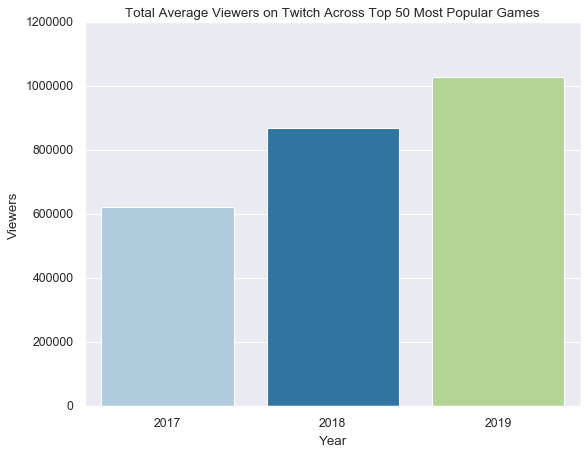

In [325]:
sns.set(style='darkgrid', palette='Paired')
fig, ax = plt.subplots()
sns.barplot(data=most_popular_games_df, x='year', y='avg_viewers', estimator=sum, ci=None)
ax.set_title('Total Average Viewers on Twitch Across Top 50 Most Popular Games')
ax.set_xlabel('Year')
ax.set_ylabel('Viewers')
plt.show()

Can also do hist of different years and how many ppl watch each game on avg?

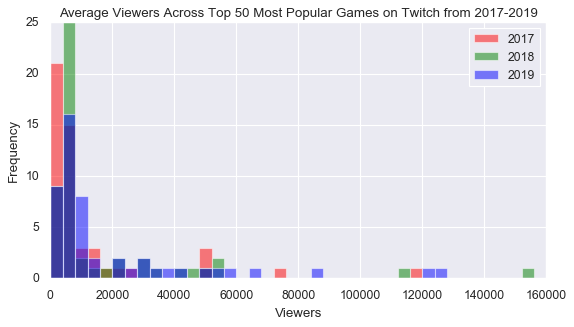

In [317]:
sns.set(style='darkgrid', palette=('red', 'green', 'blue'))
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(most_popular_games_df[most_popular_games_df.year == 2017].avg_viewers, range=(0, 160000), bins=40,\
        alpha=0.5)
ax.hist(most_popular_games_df[most_popular_games_df.year == 2018].avg_viewers, range=(0, 160000), bins=40,\
        alpha=0.5)
ax.hist(most_popular_games_df[most_popular_games_df.year == 2019].avg_viewers, range=(0, 160000), bins=40,\
        alpha=0.5)
ax.legend([2017, 2018, 2019])
ax.set_title('Average Viewers Across Top 50 Most Popular Games on Twitch from 2017-2019')
ax.set_xlabel('Viewers')
ax.set_ylabel('Frequency')
plt.show()

In [324]:
print("The average viewership across the top 50 most popular games on Twitch in 2019 was {0}"\
      .format(np.mean(most_popular_games_df[most_popular_games_df.year == 2019].avg_viewers)))
print("The median viewership across the top 50 most popular games on Twitch in 2019 was {0}"\
      .format(np.median(most_popular_games_df[most_popular_games_df.year == 2019].avg_viewers)))
print("The standard deviation for viewership across the top 50 most popular games on Twitch in 2019 was {0}"\
      .format(np.std(most_popular_games_df[most_popular_games_df.year == 2019].avg_viewers)))

The average viewership across the top 50 most popular games on Twitch in 2019 was 20588.1
The median viewership across the top 50 most popular games on Twitch in 2019 was 7538.0
The standard deviation for viewership across the top 50 most popular games on Twitch in 2019 was 28027.321135813174


## Most Popular Games

In [10]:
top_10_most_popular_games_df = pd.concat([most_popular_games_df[most_popular_games_df.year == 2017][:10],
                                          most_popular_games_df[most_popular_games_df.year == 2018][:10],
                                          most_popular_games_df[most_popular_games_df.year == 2019][:10]])

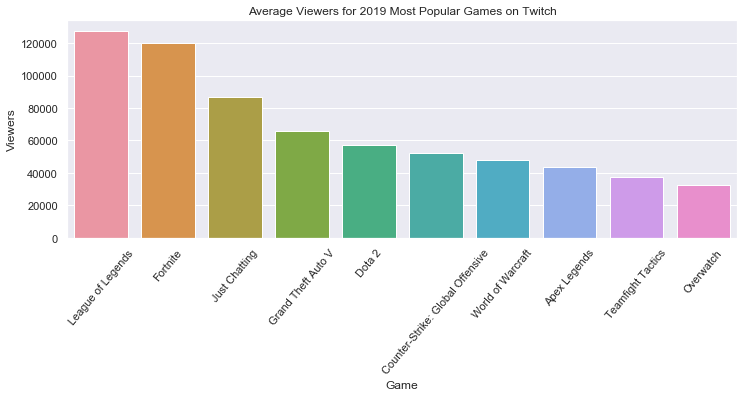

In [11]:
sns.set(style='darkgrid', palette='husl')
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(data=top_10_most_popular_games_df[top_10_most_popular_games_df.year == 2019],\
            x='game', y='avg_viewers')
plt.xticks(rotation=50)
ax.set_xlabel('Game')
ax.set_ylabel('Viewers')
ax.set_title('Average Viewers for 2019 Most Popular Games on Twitch')
plt.show()

Note that "IRL" became "Just Chatting."

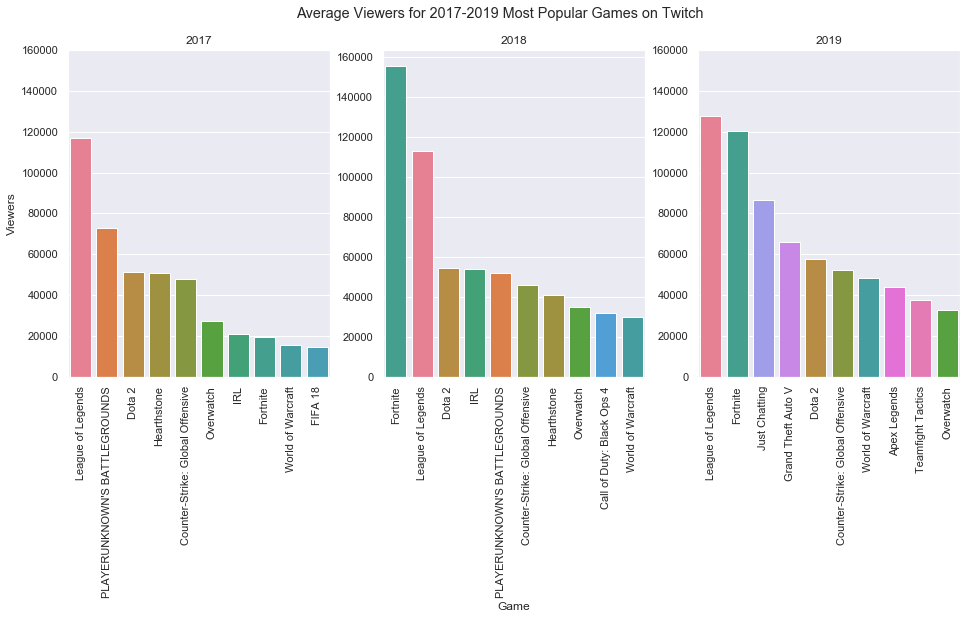

In [12]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Average Viewers for 2017-2019 Most Popular Games on Twitch')

unique = top_10_most_popular_games_df.game.unique()
palette = dict(zip(unique, sns.color_palette('husl', 15)))

sns.barplot(data=top_10_most_popular_games_df[top_10_most_popular_games_df.year == 2017], x='game', y='avg_viewers',\
            ax=ax1, palette=palette)
ax1.set_title('2017')
ax1.set_yticks(range(0, 180000, 20000))
ax1.set_xlabel(None)
ax1.set_ylabel('Viewers')

sns.barplot(data=top_10_most_popular_games_df[top_10_most_popular_games_df.year == 2018], x='game', y='avg_viewers',\
            ax=ax2, palette=palette)
ax2.set_title('2018')
ax2.set_yticks(range(0, 180000, 20000))
ax2.set_xlabel('Game')
ax2.set_ylabel(None)

sns.barplot(data=top_10_most_popular_games_df[top_10_most_popular_games_df.year == 2019], x='game', y='avg_viewers',\
            ax=ax3, palette=palette)
ax3.set_title('2019')
ax3.set_yticks(range(0, 180000, 20000))
ax3.set_xlabel(None)
ax3.set_ylabel(None)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.show()

## Most Popular Streamers

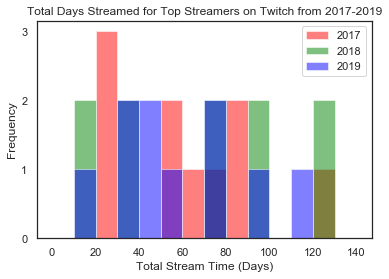

In [101]:
sns.set(style='white', palette=('red', 'green', 'blue'))
fig, ax = plt.subplots()
ax.hist(best_streamers_df[best_streamers_df.year == 2017].total_days, range=(0, 140), bins=14, alpha=0.5)
ax.hist(best_streamers_df[best_streamers_df.year == 2018].total_days, range=(0, 140), bins=14, alpha=0.5)
ax.hist(best_streamers_df[best_streamers_df.year == 2019].total_days, range=(0, 140), bins=14, alpha=0.5)
ax.set_title('Total Days Streamed for Top Streamers on Twitch from 2017-2019')
ax.set_xlabel('Total Stream Time (Days)')
ax.set_yticks([0, 1, 2, 3])
ax.set_ylabel('Frequency')
ax.legend([2017, 2018, 2019])
plt.show()

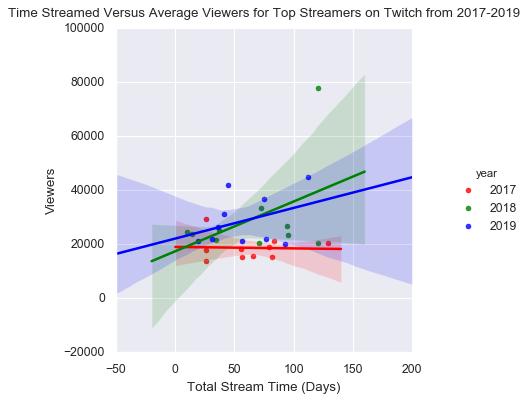

In [338]:
palette = sns.color_palette(['red', 'green', 'blue'])
sns.lmplot(data=best_streamers_df, x='total_days', y='avg_viewers', hue='year', palette=palette)
plt.title('Time Streamed Versus Average Viewers for Top Streamers on Twitch from 2017-2019', pad=10)
plt.xlabel('Total Stream Time (Days)')
plt.ylabel('Viewers')
plt.show()

In [254]:
best_streamers_games = best_streamers_df.groupby(['year', 'main_game']).streamer.count().reset_index()
best_streamers_games = best_streamers_games.rename(columns={'streamer': 'counts'})\
                                           .sort_values(by=['year', 'counts'], ascending=[True, False])\
                                           .reset_index(drop=True)

best_streamers_games_2017 = best_streamers_games[best_streamers_games.year == 2017]
best_streamers_games_2018 = best_streamers_games[best_streamers_games.year == 2018]
best_streamers_games_2019 = best_streamers_games[best_streamers_games.year == 2019]

best_streamers_games

,year,main_game,counts
0,2017,League of Legends,3
1,2017,PLAYERUNKNOWN'S BATTLEGROUNDS,3
2,2017,Variety,2
3,2017,Dota 2,1
4,2017,Hearthstone: Heroes of Warcraft,1
5,2018,Variety,5
6,2018,Fortnite,4
7,2018,League of Legends,1
8,2019,Variety,6
9,2019,Fortnite,2


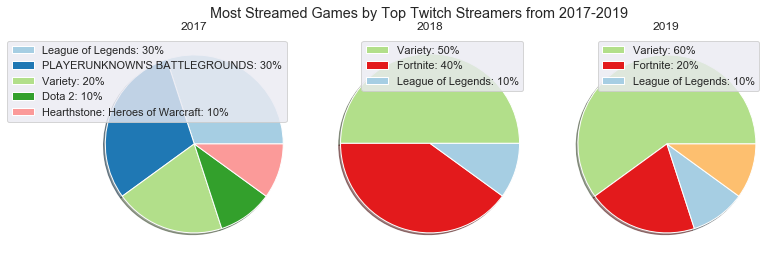

In [281]:
sns.set(style='darkgrid', palette='Paired')
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Most Streamed Games by Top Twitch Streamers from 2017-2019')

color_dict = dict(zip(best_streamers_games.main_game.unique(),\
                      sns.color_palette('Paired', best_streamers_games.main_game.nunique())))

percentage_1 = 100 * np.array(best_streamers_games_2017.counts) / sum(np.array(best_streamers_games_2017.counts))
ax1.pie(best_streamers_games_2017.counts, shadow=True,\
        colors=[color_dict[v] for v in best_streamers_games_2017.main_game])
ax1.legend(['{0}: {1:0.0f}%'.format(a, b) for (a, b) in zip(best_streamers_games_2017.main_game, percentage_1)])
ax1.set_title('2017')
ax1.axis('equal')

percentage_2 = 100 * np.array(best_streamers_games_2018.counts) / sum(np.array(best_streamers_games_2018.counts))
ax2.pie(best_streamers_games_2018.counts, shadow=True,\
        colors=[color_dict[v] for v in best_streamers_games_2018.main_game])
ax2.legend(['{0}: {1:0.0f}%'.format(a, b) for (a, b) in zip(best_streamers_games_2018.main_game, percentage_2)])
ax2.set_title('2018')
ax2.axis('equal')

percentage_3 = 100 * np.array(best_streamers_games_2019.counts) / sum(np.array(best_streamers_games_2019.counts))
ax3.pie(best_streamers_games_2019.counts, shadow=True,\
        colors=[color_dict[v] for v in best_streamers_games_2019.main_game])
ax3.legend(['{0}: {1:0.0f}%'.format(a, b) for (a, b) in zip(best_streamers_games_2018.main_game, percentage_3)])
ax3.set_title('2019')
ax3.axis('equal')

plt.show()

## Summary and Closing Thoughts